## Libraries

In [82]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

def safelog(x):
    return(np.log(x + 1e-100))

## Import Data

In [83]:
data_set = np.genfromtxt(fname = "hw02_data_points.csv", delimiter = ",")
class_labels = np.genfromtxt(fname = "hw02_class_labels.csv").astype(int)

w_data = np.genfromtxt(fname = "hw02_W_initial.csv", delimiter = ",")
w0_data = np.genfromtxt(fname = "hw02_w0_initial.csv", delimiter = ",")

training_data = data_set[0:10000]
test_data = data_set[10000:]

## Algorithm Parameters

In [84]:
eta = 0.00001
iteration_count = 1000

D = data_set.shape[1]
X = data_set[0:10000,:]
N = X.shape[0]
K = np.max(class_labels)

#y_truth = shows which cloth is in which class
y_truth = np.zeros((N, K)).astype(int)
y_truth[range(N), class_labels[0:10000]-1] = 1

w = w_data[:,:]
w0 = w0_data[:]

## Sigmoid Function

In [85]:
def sigmoid(X, w_set, w0_set):
    return(1 / (1 + np.exp(-(np.matmul(X, w_set) + w0_set))))

## Gradient Functions

In [86]:
def gradient_w0(y_truth, y_predicted):
    return np.sum((y_truth - y_predicted) * y_predicted * (y_predicted - 1), axis = 0)

def gradient_W(X, y_truth, y_predicted):
    return np.asarray([-np.matmul(X.transpose(), (y_truth[:, c] - y_predicted[:,c]) * y_predicted[:, c] * (y_predicted[:,c]-1)) for c in range(K)]).transpose()

## Iterative Algorithm (Question 4)

In [87]:
iteration = 0
objective_values = []

while iteration < iteration_count:
    y_predicted = sigmoid(X, w_data, w0_data)
    objective_values = np.append(objective_values, 0.5 * np.sum((y_truth - y_predicted)**2))
    w0_data = w0_data - eta * gradient_w0(y_truth, y_predicted)
    w_data = w_data + eta * gradient_W(X, y_truth, y_predicted)
    iteration = iteration + 1

print(w_data)
print(w0_data)

[[-0.01324798 -0.02823844 -0.00326868 ... -0.04877851  0.01212054
  -0.01143465]
 [-0.01183842 -0.03963016 -0.01295336 ... -0.04034705  0.00400381
  -0.02111644]
 [-0.01998825 -0.03633561 -0.00489235 ... -0.04108662  0.01387463
  -0.02484677]
 ...
 [-0.01341638 -0.0199712  -0.02071762 ... -0.03364511  0.00594223
  -0.01845717]
 [-0.00980747 -0.03218592 -0.02022552 ... -0.03211477  0.01611503
  -0.00845905]
 [-0.01977218 -0.02373074 -0.01468591 ... -0.04159601  0.01068509
  -0.02400039]]
[-0.01287857 -0.02891159 -0.00873806 -0.03535891 -0.02597275 -0.06542254
 -0.01501564 -0.0451543   0.00689065 -0.01964791]


## Question 5

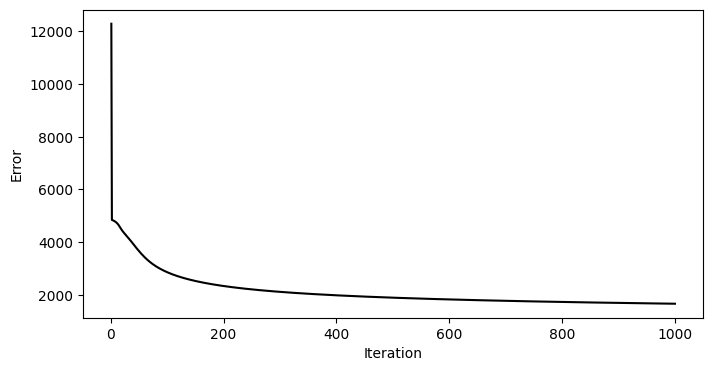

In [88]:
plt.figure(figsize = (8, 4))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Question 6

In [89]:
Truth_array = np.argmax(y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(Truth_array.T, class_labels[0:10000].T,
                               rownames = ["y_pred"],
                               colnames = ["y_truth"])
print(confusion_matrix)

y_truth   1    2    3    4    5    6    7    8    9    10
y_pred                                                   
1        838    3   14   44    5    0  220    0    1    0
2          4  908    1   17    4    0    3    0    2    0
3         14   12  645   14   69    0  133    0    9    1
4         89   37    5  870   41    2   55    0   12    2
5          2    6  172   28  763    0  123    0    6    0
6         16    3   26    5    8  841   30   89   25   33
7         27    3   80   28   79    0  423    0   17    0
8          0    0    0    0    0  115    1  862    8   43
9         18    0    8    5   10   13   34    2  892    0
10         1    0    0    1    0   37    0   84    2  957


## Question 7

In [90]:
iteration = 0
objective_values = []
X = data_set[10000:,:]
N = X.shape[0]

y_truth = np.zeros((N, K)).astype(int)
y_truth[range(N), class_labels[10000:]-1] = 1

y_predicted = sigmoid(X, w_data, w0_data)
Truth_array = np.argmax(y_predicted, axis = 1) + 1

confusion_matrix = pd.crosstab(Truth_array.T, class_labels[10000:].T,
                               rownames = ["y_pred"],
                               colnames = ["y_truth"])
print(confusion_matrix)

y_truth   1    2    3    4    5    6    7    8    9    10
y_pred                                                   
1        397    1   11   22    0    1  129    0    0    0
2          4  459    0    8    3    0    1    0    0    0
3          7   10  320    6   49    1   52    0    5    0
4         51   15    3  443   19    1   31    0   10    0
5          2    2   83   14  382    0   58    0    1    0
6          9    2   13    2    4  405   12   39   14   18
7         14    1   50   11   47    0  218    0    9    0
8          1    0    0    0    0   47    0  387    7   27
9         16    0   10    1    2    7   18    1  459    0
10         1    0    0    0    0   28    0   44    3  472
